In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import statsmodels.stats.multitest

In [2]:
normalized_bulk_seq = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_normalized.csv', index_col= 0)
#normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
bulk_seq_summary = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_metadata_no_outliers.csv',index_col= 0)

In [3]:
bulk_seq_summary = bulk_seq_summary.drop_duplicates(subset= ['condition'], keep= 'first')
bulk_seq_summary.at['fea3.2_1b','condition'] = 'fea3.2'

In [4]:
NAM_line_list = bulk_seq_summary['condition'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['size']
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [5]:
bulk_seq_summary

,condition,size,size_bin,batch
sampName,,,,
B73_1b,B73,454.888985,c,2
B104_1,B104,351.818059,b,1
CML103_1b,CML103,371.815220,b,2
CML228_1b,CML228,379.897533,b,2
CML277_1,CML277,335.326761,b,1
CML322_1b,CML322,338.457642,b,2
CML333_1b,CML333,272.621221,a,2
CML52_1b,CML52,252.947305,a,2
CML69_1b,CML69,435.417460,c,2


In [ ]:
bulk_seq_summary_no_fea = bulk_seq_summary.drop('fea3.2_1b')

In [6]:
NAM_list_of_avg_meristem_sizes

B73       454.888985
B104      351.818059
CML103    371.815220
CML228    379.897533
CML277    335.326761
CML322    338.457642
CML333    272.621221
CML52     252.947305
CML69     435.417460
fea3.2    942.394714
Hp301     361.244958
Il14H     376.638873
Ki11      237.449468
Ki3       378.559959
Ky21      266.585155
M162W     301.697487
Mo17      276.613015
Mo18W     413.673750
Ms71      340.853601
NC350     400.000000
NC358     400.000000
Oh7B      340.373941
P39       362.774076
Tx303     318.139920
Oh43      341.000000
Tzi8      406.175635
Name: size, dtype: float64

In [7]:
NAM_line_list

['B73',
 'B104',
 'CML103',
 'CML228',
 'CML277',
 'CML322',
 'CML333',
 'CML52',
 'CML69',
 'fea3.2',
 'Hp301',
 'Il14H',
 'Ki11',
 'Ki3',
 'Ky21',
 'M162W',
 'Mo17',
 'Mo18W',
 'Ms71',
 'NC350',
 'NC358',
 'Oh7B',
 'P39',
 'Tx303',
 'Oh43',
 'Tzi8']

In [8]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [9]:
normalized_mean_values_of_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093344,1.171424,0.707738,1.505207,1.418244,0.688642,0.344226,0.356207,0.316641,2.270416,1.097803,...,0.711404,1.041700,0.000000,1.769452,0.000000,0.557644,0.547958,0.281553,0.369079,0.000000
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.365918,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.639803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.131662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.489846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464
NDHD,0.924606,0.914186,0.262601,0.826671,0.693755,0.951214,0.464466,0.741182,0.756805,1.286163,...,1.073361,0.113652,0.591419,0.489846,0.000000,0.476555,1.677580,3.357361,0.770784,1.949200
PSAC,0.000000,0.000000,0.000000,0.149595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.299835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.228580,0.000000,0.000000,0.269987,0.327837,0.000000,0.000000,0.204460,0.630397,0.193112,...,0.459901,0.084490,0.591419,0.000000,0.000000,0.000000,1.643873,0.000000,0.000000,0.000000


In [10]:
pearson_correlation_with_meristem_size = normalized_mean_values_of_each_landrace.corrwith(other = NAM_list_of_avg_meristem_sizes,axis = 1,method = 'pearson')
pearson_correlation_with_meristem_size = pd.DataFrame(pearson_correlation_with_meristem_size,columns = ['Pearson Correlation with Meristem Width'])
pearson_correlation_with_meristem_size.sort_values(by = 'Pearson Correlation with Meristem Width', ascending = False )

,Pearson Correlation with Meristem Width
GRMZM2G343236,0.918943
GRMZM5G814481,0.917099
GRMZM2G066202,0.917074
GRMZM2G020666,0.916834
GRMZM2G105429,0.913681
...,...
GRMZM2G176141,-0.586731
GRMZM5G890843,-0.593279
GRMZM2G151962,-0.597849
GRMZM2G166413,-0.614870


In [11]:
pearson_correlation_with_meristem_size['Pearson Correlation with Meristem Width'].dropna()

GRMZM2G059865      -0.335564
GRMZM2G093344       0.228048
GRMZM2G093399      -0.194729
GRMZM5G809743       0.011036
GRMZM5G833153       0.078557
                      ...   
RPS3.1             -0.252612
NDHD                0.139812
PSAC               -0.130122
AC191109.3_FG001   -0.147507
GRMZM2G372364       0.892970
Name: Pearson Correlation with Meristem Width, Length: 28050, dtype: float64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

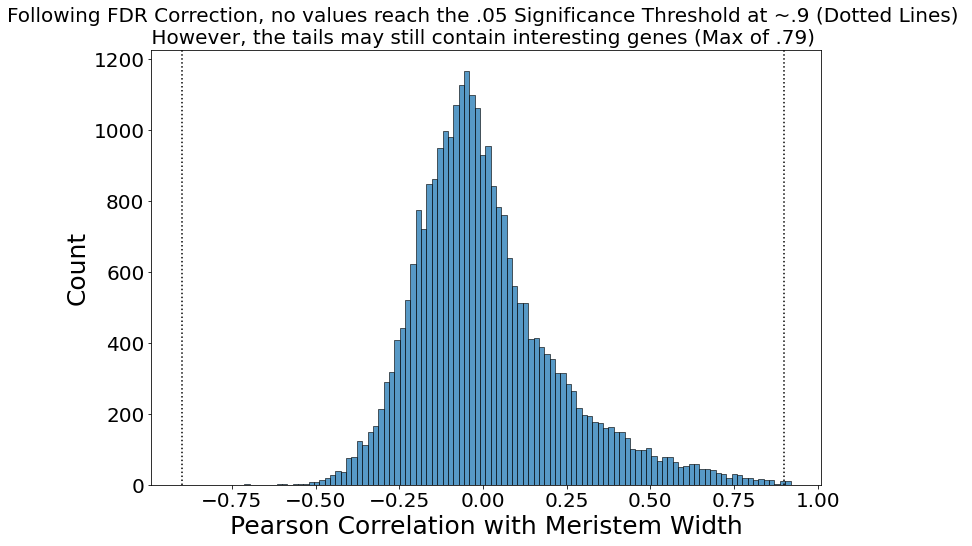

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = pearson_correlation_with_meristem_size, x = 'Pearson Correlation with Meristem Width')
plt.axvline(x = .9, linestyle= ':', color = 'k')
plt.axvline(x = -.9, linestyle= ':', color = 'k')
plt.ylabel("Count", fontsize=25)
plt.xlabel("Pearson Correlation with Meristem Width", fontsize=25)
plt.title(
    "Following FDR Correction, no values reach the .05 Significance Threshold at ~.9 (Dotted Lines) \n However, the tails may still contain interesting genes (Max of .79)  ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [13]:
corr_and_p_value_list = []
for land_race_gene in normalized_mean_values_of_each_landrace.iterrows():
    current_correlation, current_pvalue = stats.pearsonr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

In [14]:
stats_and_pearson_calculated = pd.DataFrame(index = pearson_correlation_with_meristem_size.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [15]:
reject, corrected = statsmodels.stats.multitest.fdrcorrection(stats_and_pearson_calculated['P Value'])

In [16]:
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [20]:
stats_and_pearson_calculated.sort_values(by = 'P Value').head(10)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G343236,0.918943,3.493048e-11,3.297008e-07
GRMZM5G814481,0.917099,4.531814e-11,3.297008e-07
GRMZM2G066202,0.917074,4.547043e-11,3.297008e-07
GRMZM2G020666,0.916834,4.701616e-11,3.297008e-07
GRMZM2G105429,0.913681,7.226944e-11,4.054316e-07
GRMZM5G808853,0.908484,1.418290e-10,5.073418e-07
GRMZM2G077655,0.908343,1.443630e-10,5.073418e-07
CISZOG2,0.907071,1.691736e-10,5.073418e-07
GRMZM2G151763,0.906357,1.847576e-10,5.073418e-07
GRMZM2G354123,0.904717,2.255901e-10,5.073418e-07


<AxesSubplot:xlabel='P Value', ylabel='Count'>

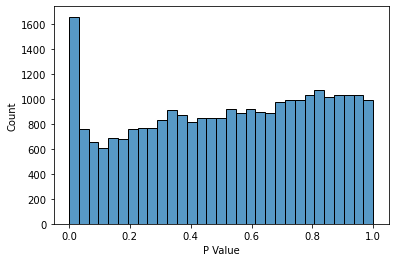

In [18]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

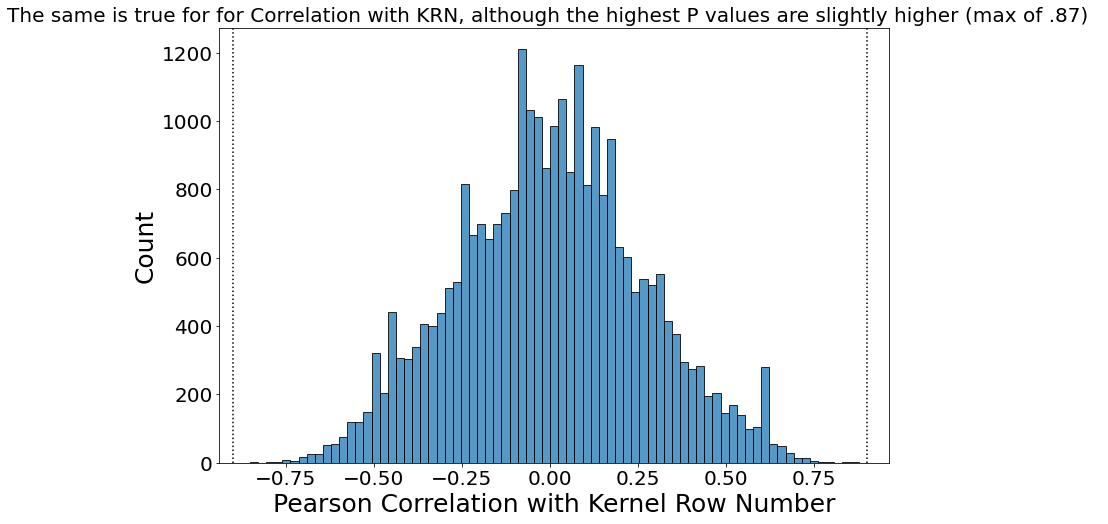

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = krn_stats_and_pearson, x = 'Pearson Correlation with KRN')
plt.axvline(x = .9, linestyle= ':', color = 'k')
plt.axvline(x = -.9, linestyle= ':', color = 'k')
plt.ylabel("Count", fontsize=25)
plt.xlabel("Pearson Correlation with Kernel Row Number", fontsize=25)
plt.title(
    "The same is true for for Correlation with KRN, although the highest P values are slightly higher (max of .87)  ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [40]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name
    if type(species) == int:
        mapper = pd.read_csv(
            '/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv'
        )
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location, sep=' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1
    matrixed_version = original_csv.pivot(index='NetworkIDs',
                                          columns='GO_term',
                                          values='Present')
    filled_matrixed_version = matrixed_version.fillna(value=0)
    return filled_matrixed_version

In [41]:
def generate_contigency_tables(go_annotations,gene_list):
    gene_list = list(set(go_annotations.index) & set(gene_list))
    background_distribution_num_genes_annotated_with_go_term = go_annotations.sum(axis =0)
    background_dipstribution_num_genes_that_lack_go_term = go_annotations.shape[0]-background_distribution_num_genes_annotated_with_go_term
    annotation_subset_to_genes_in_list = go_annotations.loc[gene_list]
    go_subset_distribution_num_genes_annotatated_with_go_term = annotation_subset_to_genes_in_list.sum(axis =0)
    go_subset_distribution_num_genes_that_lack_go_term = annotation_subset_to_genes_in_list.shape[0] - go_subset_distribution_num_genes_annotatated_with_go_term
    
    all_go_contingency_tables = []
    i = 0
    for term_of_go in background_distribution_num_genes_annotated_with_go_term:
        contig_table = [[(term_of_go - go_subset_distribution_num_genes_annotatated_with_go_term[i]),go_subset_distribution_num_genes_annotatated_with_go_term[i]],[(background_dipstribution_num_genes_that_lack_go_term[i]-go_subset_distribution_num_genes_that_lack_go_term[i]),go_subset_distribution_num_genes_that_lack_go_term[i]]]
        all_go_contingency_tables.append(contig_table)
        i +=1
    return all_go_contingency_tables

In [42]:
## Penelope both sides otherwise comment out

#stats_and_pearson_calculated['Pearson Correlation with Meristem Width'] = abs(stats_and_pearson_calculated['Pearson Correlation with Meristem Width'])
#stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:3000]

#krn_stats_and_pearson['Pearson Correlation with KRN'] = abs(krn_stats_and_pearson['Pearson Correlation with KRN'])

In [43]:
# normal, then abs, then neg
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:1750].index.to_list()
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:3000].index.to_list()
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-800:].index.to_list()


#KRN Association
#list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[:2000].index.to_list()
list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[-1500:].index.to_list()

In [44]:
krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[-1500:]

,Pearson Correlation with KRN,P Value,Corrected P Value
GRMZM2G391627,-0.442934,0.098229,0.913224
AC194712.3_FG002,-0.442934,0.098229,0.913224
GRMZM5G835933,-0.442934,0.098229,0.913224
GRMZM2G158831,-0.442934,0.098229,0.913224
GRMZM2G558912,-0.442934,0.098229,0.913224
...,...,...,...
GRMZM2G333997,-0.772338,0.000739,0.736555
GRMZM2G054870,-0.773472,0.000718,0.736555
GRMZM2G140352,-0.796732,0.000377,0.736555
GRMZM2G112672,-0.831781,0.000121,0.687562


In [45]:
stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-1750:]

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G103345,-0.399831,0.139777,0.95612
GRMZM2G417770,-0.399902,0.139701,0.95612
GRMZM2G424397,-0.399945,0.139654,0.95612
GRMZM2G145527,-0.399984,0.139612,0.95612
GRMZM2G171559,-0.399987,0.139609,0.95612
...,...,...,...
GRMZM2G012758,-0.740821,0.001580,0.95612
GRMZM2G102550,-0.744478,0.001455,0.95612
AC155390.2_FG002,-0.752372,0.001211,0.95612
GRMZM2G440459,-0.773901,0.000710,0.95612


In [66]:
maize_go = get_go_annotations_as_panda('maize')
maize_go

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001239,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
maize_converter = pd.read_csv('/data/CoCoCoNet/geneInfo/maize_info.csv')
maize_converter['Synonyms'] = maize_converter['Synonyms'].str.split('|')

In [48]:
maize_converter = maize_converter.dropna(subset = ['Synonyms'])
maize_converter

,EntrezID,EnsemblID,GeneSymbol,LocusTag,Synonyms,dbXrefs,Chromosome,Type,UniProtID,UniProtID2,OrthoID,NetworkIDs
0,100382519.0,Zm00001d027231,LOC100382519,ZEAMMB73_Zm00001d027231,"[, GRMZM2G059865, pco082477, ]",|NA|,1,protein-coding,C0P8I2,NaN,4577_0:0000f4,Zm00001d027231
2,100193420.0,Zm00001d027267,LOC100193420,ZEAMMB73_Zm00001d027267,"[, GRMZM2G374779, ]",|NA|,1,protein-coding,B4FEZ2,NaN,4577_0:000b35,Zm00001d027267
3,100283177.0,Zm00001d027268,LOC100283177,ZEAMMB73_Zm00001d027268,"[, GRMZM2G374812, ]",|NA|,1,protein-coding,B4FS29,NaN,4577_0:0000c0,Zm00001d027268
4,103630457.0,Zm00001d027276,LOC103630457,ZEAMMB73_Zm00001d027276,"[, GRMZM2G002121, ]",|NA|,1,protein-coding,A0A1D6JJP0,NaN,4577_0:000fce,Zm00001d027276
5,100279889.0,Zm00001d027277,LOC100279889,ZEAMMB73_Zm00001d027277,"[, GRMZM2G026639, gpm923, ]",|NA|,1,protein-coding,B8A0H4,NaN,4577_0:001205,Zm00001d027277
...,...,...,...,...,...,...,...,...,...,...,...,...
19460,100272924.0,Zm00001d000438,LOC100272924,ZEAMMB73_Zm00001d000438,"[, GRMZM2G175812, ]",|NA|,7,protein-coding,B4F9D7,NaN,4577_0:0065fa,Zm00001d000438
19461,100283797.0,Zm00001d000439,LOC100283797,ZEAMMB73_Zm00001d000439,"[, GRMZM5G886913, TIDP3392, ]",|NA|,Un,protein-coding,B6TLY1,NaN,4577_0:009063,Zm00001d000439
19462,103646008.0,Zm00001d000443,LOC103646008,ZEAMMB73_Zm00001d000443,"[, GRMZM2G354053, ]",|NA|,Un,protein-coding,A0A1X7YIT5,NaN,4577_0:009064,Zm00001d000443
19463,100277867.0,Zm00001d000447,LOC100277867,ZEAMMB73_Zm00001d000447,"[, GRMZM2G120940, ]",|NA|,10,protein-coding,A0A1X7YJ96,NaN,4577_0:00910f,Zm00001d000447


In [49]:
maize_converter['Synonyms'] = list(zip(*maize_converter['Synonyms'].to_list()))[1]
maize_converter_for_bruno = maize_converter[['GeneSymbol','Synonyms','EnsemblID']]
maize_converter = maize_converter[['Synonyms','EnsemblID']]
maize_converter

,Synonyms,EnsemblID
0,GRMZM2G059865,Zm00001d027231
2,GRMZM2G374779,Zm00001d027267
3,GRMZM2G374812,Zm00001d027268
4,GRMZM2G002121,Zm00001d027276
5,GRMZM2G026639,Zm00001d027277
...,...,...
19460,GRMZM2G175812,Zm00001d000438
19461,GRMZM5G886913,Zm00001d000439
19462,GRMZM2G354053,Zm00001d000443
19463,GRMZM2G120940,Zm00001d000447


In [50]:
#maize_converter_for_bruno.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/maize_gene_conversion_list.csv')

In [51]:
list(set(maize_go.index) & set(list_of_high_genes))

[]

In [52]:
panda_of_high_genes = pd.DataFrame(data = list_of_high_genes,columns = ['Genes'])

In [53]:
panda_of_high_genes

,Genes
0,GRMZM2G391627
1,AC194712.3_FG002
2,GRMZM5G835933
3,GRMZM2G158831
4,GRMZM2G558912
...,...
1495,GRMZM2G333997
1496,GRMZM2G054870
1497,GRMZM2G140352
1498,GRMZM2G112672


In [54]:
panda_genes_converted = panda_of_high_genes.merge(how = 'left', right = maize_converter,left_on='Genes', right_on='Synonyms')
panda_genes_converted = panda_genes_converted.dropna(subset = ['EnsemblID'])

genes_for_enrichment = panda_genes_converted['EnsemblID'].to_list()

In [55]:
high_meristem_contig_tables = generate_contigency_tables(go_annotations = maize_go, gene_list = genes_for_enrichment)

In [71]:
type(high_meristem_contig_tables)

list

In [56]:
list_of_p_values_go_change = []
for table in high_meristem_contig_tables:
    odds, p_value = stats.fisher_exact(table = table, alternative = 'less')
    list_of_p_values_go_change.append(p_value)

In [57]:
go_set_refiner = pd.DataFrame(data = list_of_p_values_go_change,index = maize_go.columns, columns = ['P_value'])
go_set_refiner

,P_value
GO_term,
GO:0000002,1.000000
GO:0000003,0.128047
GO:0000009,1.000000
GO:0000012,1.000000
GO:0000014,0.166090
...,...
GO:2001252,1.000000
GO:2001253,1.000000
GO:2001289,1.000000


In [58]:
go_group_size = maize_go.sum(axis = 0)>5
go_group_size = go_group_size.to_list()
maize_go_transposed = maize_go.T
big_enough_go_groups = maize_go_transposed.loc[go_group_size]
big_enough_go_groups

NetworkIDs,Zm00001d000001,Zm00001d000002,Zm00001d000004,Zm00001d000006,Zm00001d000008,Zm00001d000011,Zm00001d000012,Zm00001d000016,Zm00001d000017,Zm00001d000018,...,Zm00001d054096,Zm00001d054098,Zm00001d054099,Zm00001d054100,Zm00001d054104,Zm00001d054105,Zm00001d054106,Zm00001d054107,Zm00001d054110,Zm00001d054111
GO_term,,,,,,,,,,,,,,,,,,,,,
GO:0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:2001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
go_set_refiner = go_set_refiner.loc[go_set_refiner.index.isin(big_enough_go_groups.index)]

In [80]:
go_set_refiner.at['GO:0000003', 'P_value'] = .00000001

In [72]:
import GO_Enrichment_Calculator as gr


In [86]:
gr.tester(go_terms_with_P_value= go_set_refiner, alpha = .1, Include_rejected_boolean_array= True)

(array([ True, False, False, ..., False, False, False]),
              P_value
 GO_term             
 GO:0000003  0.000048
 GO:0000014  1.000000
 GO:0000015  1.000000
 GO:0000018  1.000000
 GO:0000026  1.000000
 ...              ...
 GO:2001057  1.000000
 GO:2001070  1.000000
 GO:2001141  1.000000
 GO:2001251  1.000000
 GO:2001252  1.000000
 
 [4845 rows x 1 columns])

In [60]:
rejected, corrected_pvalues = statsmodels.stats.multitest.fdrcorrection(pvals = go_set_refiner['P_value'].to_list(), alpha = .05)
corrected_pvalues = corrected_pvalues.tolist()
go_enrichment_results = pd.DataFrame(corrected_pvalues,index = go_set_refiner.index,columns=['P_value'])

In [61]:
go_enrichment_results = go_enrichment_results.sort_values('P_value',ascending = False)
#go_enrichment_results.tail(20).to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Stuff_to_send_to_Penelope/negatively_correlated_go_results.csv')

In [62]:
go_enrichment_results.tail(20)

,P_value
GO_term,
GO:0009753,1.0
GO:0009800,1.0
GO:0009803,1.0
GO:0009808,1.0
GO:0009833,1.0
GO:0009853,1.0
GO:0009852,1.0
GO:0009850,1.0
GO:0009846,1.0


In [63]:
panda_genes_converted

,Genes,Synonyms,EnsemblID
3,GRMZM2G158831,GRMZM2G158831,Zm00001d033080
5,GRMZM2G093595,GRMZM2G093595,Zm00001d038001
8,GRMZM2G002630,GRMZM2G002630,Zm00001d035558
14,GRMZM2G125350,GRMZM2G125350,Zm00001d025587
19,GRMZM2G372102,GRMZM2G372102,Zm00001d002093
...,...,...,...
1496,GRMZM2G096824,GRMZM2G096824,Zm00001d021363
1497,GRMZM2G704021,GRMZM2G704021,Zm00001d033600
1499,GRMZM2G054870,GRMZM2G054870,Zm00001d021861
1500,GRMZM2G140352,GRMZM2G140352,Zm00001d019234


In [64]:
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0009966'] ==1) | (big_enough_go_groups.T['GO:0048583'] == 1) | (big_enough_go_groups.T['GO:0080134'] == 1) | (big_enough_go_groups.T['GO:0031347'] == 1)]
#genes_in_group_of_interest = big_enough_go_groups.T.loc[big_enough_go_groups.T['GO:0048608'] == 1]
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0048731'] ==1) | (big_enough_go_groups.T['GO:0032501'] == 1) | (big_enough_go_groups.T['GO:0048856'] == 1) | (big_enough_go_groups.T['GO:0007275'] == 1) | (big_enough_go_groups.T['GO:0009791'] == 1) | (big_enough_go_groups.T['GO:0003006'] == 1)]


In [65]:
genes_in_group_of_interest

NameError: name 'genes_in_group_of_interest' is not defined

In [ ]:
list_of_significant_genes = genes_in_group_of_interest.loc[genes_in_group_of_interest.index.isin(genes_for_enrichment)].index.to_list()


In [ ]:
list_of_significant_genes_in_grm_format = panda_genes_converted.loc[panda_genes_converted['EnsemblID'].isin(list_of_significant_genes)]
list_of_significant_genes_in_grm_format = list_of_significant_genes_in_grm_format['Genes'].to_list()


In [ ]:
list_of_significant_genes_in_grm_format

In [ ]:
significantly_annotated_genes = stats_and_pearson_calculated.loc[stats_and_pearson_calculated.index.isin(list_of_significant_genes_in_grm_format)]

In [ ]:
#significantly_annotated_genes.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Stuff_to_send_to_Penelope/abs_value_associated_genes.csv')	

In [ ]:
sns.histplot(go_enrichment_results,)
plt.ylim(0,1000)

In [ ]:
uncorrected_values = pd.DataFrame(data = list_of_p_values_go_change, columns = ['P Value'])

In [ ]:
sns.histplot(uncorrected_values)

In [ ]:
maize_go